### Guided Practice: Logit Function and Odds

In [313]:
import numpy as np
import pandas as pd

In [314]:
def logit_func(odds):
    # uses a float (odds) and returns back the log odds (logit)
    return np.log(odds)


def sigmoid_func(logit):
    return (1.0/(1+np.exp(-logit)))

odds_set = [
    5./1,
    20./1,
    1.1/1,
    1.8/1,
    1.6/1
]

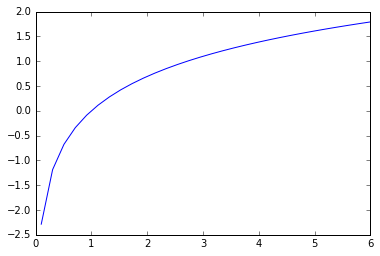

In [315]:
# plot out the logit function and sigmoid function

%matplotlib inline
import matplotlib.pyplot as plt
xaxis = np.linspace(-6,6,60)
y = logit_func(xaxis)
plt.plot(xaxis,y)

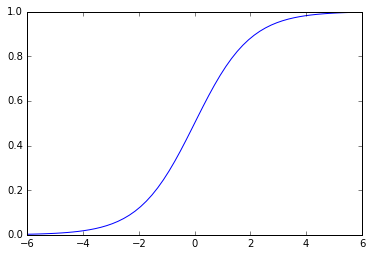

In [316]:
xaxis = np.linspace(-6,6,60)
y = sigmoid_func(xaxis)
plt.plot(xaxis,y)

In [317]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [318]:
lm = LogisticRegression()

df = pd.read_csv('../../assets/dataset/collegeadmissions.csv')

In [319]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [320]:
df = df.join(pd.get_dummies(df['rank']))

# convert rank to four different columns

In [321]:
df['rank'].head(4)

0    3
1    3
2    1
3    4
Name: rank, dtype: int64

In [322]:
df.head()
# 1 > 2 > 3 = ordinal variable. T
#he order is easier. If blue, orange, red, black

,admit,gre,gpa,rank,1,2,3,4
0,0,380,3.61,3,0.0,0.0,1.0,0.0
1,1,660,3.67,3,0.0,0.0,1.0,0.0
2,1,800,4.00,1,1.0,0.0,0.0,0.0
3,1,640,3.19,4,0.0,0.0,0.0,1.0
4,0,520,2.93,4,0.0,0.0,0.0,1.0


#### How many of the get_dummies columns should we take

In [323]:
lm.fit(df[['gre', 'gpa', 1, 2, 3,]], df['admit'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [324]:
import numpy as np

In [325]:
print lm.coef_
print lm.intercept_
print df.admit.mean()

# p = 1 (1+e^-a)
# log(P / 1 - P)


[[  1.63913356e-03   4.33355414e-04   1.15220976e+00   5.14395668e-01
   -3.62326166e-02]]
[-2.09315184]
0.3175


In [326]:
sigmoid_func(lm.intercept_)

array([ 0.10976421])

Below is some code to walk through confusion matrices. It'll be useful for working through the Titanic problem.

In [327]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

Below the ROC curve is based on various thresholds: it shows with a false positive rate (x-axis) ~0, it also expects a true positive rate (y-axis) ~0 (the same, ish, for the top right hand of the figure).

The second chart, which does not play with thesholds, shows the one true TPR and FPR point, joined to 0,0 and 1,1.

The first chart will be more effective as you compare models and determine where the decision line should exist for the data. The second simplifies the first in case this idea of thresholds is confusing.

In [328]:
feature_set = df[['gre', 'gpa', 1, 2, 3,]]
print lm.score(feature_set, df['admit'])

0.7


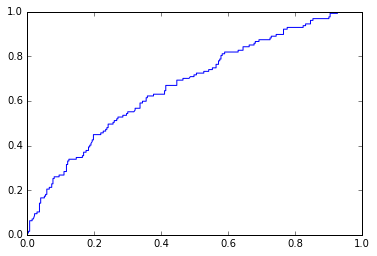

In [329]:
actuals = lm.predict(feature_set) 
probas = lm.predict_proba(feature_set)
plt.plot(roc_curve(df[['admit']], probas[:,1])[0], roc_curve(df[['admit']], probas[:,1])[1])

Finally, you can use the `roc_auc_score` function to calculate the area under these curves (AUC).

In [330]:
roc_auc_score(df['admit'], lm.predict(feature_set))

0.55914164575581893

### Titanic Problem

** Goals **

1. Spend a few minutes determining which data would be most important to use in the prediction problem. You may need to create new features based on the data available. Consider using a feature selection aide in sklearn. But a worst case scenario; identify one or two strong features that would be useful to include in the model.
2. Spend 1-2 minutes considering which _metric_ makes the most sense to optimize. Accuracy? FPR or TPR? AUC? Given the business problem (understanding survival rate aboard the Titanic), why should you use this metric?
3. Build a tuned Logistic model. Be prepared to explain your design (including regularization), metric, and feature set in predicting survival using the tools necessary (such as a fit chart).

In [331]:
titanic = pd.read_csv('../../assets/dataset/titanic.csv')

In [332]:
titanic.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [333]:
# we are trying to predict who has survived
# we need to translate PClass into dummies

print titanic['Parch'].unique()
print titanic.describe()

[0 1 2 5 3 4 6]
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000         NaN    0.000000   
50%     446.000000    0.000000    3.000000         NaN    0.000000   
75%     668.500000    1.000000    3.000000         NaN    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [334]:
# test one. PClass

titanic = titanic.join(pd.get_dummies(titanic.Pclass,prefix="PClass"))


In [335]:
titanic.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PClass_1,PClass_2,PClass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,0.0,0.0


In [336]:
titanic = titanic.join(pd.get_dummies(titanic.Parch,prefix="Parch"))

In [337]:
titanic = titanic.join(pd.get_dummies(titanic.Sex,prefix="Sex"))

In [338]:
titanic['Age'] = titanic.Age.fillna(method='bfill')

In [339]:
titanic.Survived.head(4)

0    0
1    1
2    1
3    1
Name: Survived, dtype: int64

In [340]:
lm.fit(titanic[['Age', 'PClass_1','PClass_2','Parch_1','Parch_2','Parch_3',\
                'Parch_4','Parch_5','Fare']], titanic['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [341]:
print lm.coef_
print lm.intercept_

[[-0.02274472  1.57896997  1.00973123  0.57172621  0.21524513  0.74639381
  -0.76129605  0.01704744  0.00493888]]
[-0.69271967]


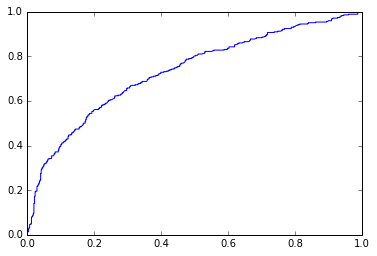

In [344]:
feature_set = titanic[['Age', 'PClass_1','PClass_2','Parch_1','Parch_2','Parch_3',\
                'Parch_4','Parch_5','Fare']]

actuals = lm.predict(feature_set) 
probas = lm.predict_proba(feature_set)
plt.plot(roc_curve(titanic[['Survived']], probas[:,1])[0], \
         roc_curve(titanic[['Survived']], probas[:,1])[1])

In [345]:
print lm.score(feature_set, titanic['Survived'])

0.708193041526


In [346]:
from sklearn import grid_search, cross_validation

gs = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'C': [i for i in range(1, 10)], 'class_weight': [None, 'auto']},
    cv=cross_validation.KFold(n=len(titanic), n_folds=10),
    scoring='roc_auc'
)


gs.fit(feature_set, titanic.Survived)
gs.grid_scores_
#print gs.best_estimator_


/Users/tristanalmada/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/tristanalmada/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/tristanalmada/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/tristanalmada/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is de

[mean: 0.71834, std: 0.08961, params: {'C': 1, 'class_weight': None},
 mean: 0.71851, std: 0.08900, params: {'C': 1, 'class_weight': 'auto'},
 mean: 0.71828, std: 0.08987, params: {'C': 2, 'class_weight': None},
 mean: 0.71851, std: 0.08952, params: {'C': 2, 'class_weight': 'auto'},
 mean: 0.71804, std: 0.09004, params: {'C': 3, 'class_weight': None},
 mean: 0.71820, std: 0.08992, params: {'C': 3, 'class_weight': 'auto'},
 mean: 0.71795, std: 0.09060, params: {'C': 4, 'class_weight': None},
 mean: 0.71831, std: 0.08991, params: {'C': 4, 'class_weight': 'auto'},
 mean: 0.71806, std: 0.09046, params: {'C': 5, 'class_weight': None},
 mean: 0.71833, std: 0.08989, params: {'C': 5, 'class_weight': 'auto'},
 mean: 0.71821, std: 0.09025, params: {'C': 6, 'class_weight': None},
 mean: 0.71823, std: 0.09005, params: {'C': 6, 'class_weight': 'auto'},
 mean: 0.71826, std: 0.09006, params: {'C': 7, 'class_weight': None},
 mean: 0.71847, std: 0.09026, params: {'C': 7, 'class_weight': 'auto'},
 mean: